## Online available

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/compmec/strct/blob/main/examples/example09.ipynb)

At [Github/compmec/strct/examples/example09.ipynb](https://github.com/compmec/strct/blob/main/examples/example09.ipynb)

# Example 09

![](https://raw.githubusercontent.com/compmec/strct/examples/examples/img/example09_prob.png)


First we import what we will use.

In [12]:
try:
    import compmec.strct
except ModuleNotFoundError as e:
    import os
    os.system("pip install compmec-nurbs")
    os.system("pip install compmec-strct")
import numpy as np
from matplotlib import pyplot as plt
from compmec.strct.element import EulerBernoulli
from compmec.strct.profile import Circle, Retangular
from compmec.strct.material import Isotropic
from compmec.strct.system import StaticSystem
from compmec.strct.shower import ShowerStaticSystem

Then we create the elements we will use 

In [13]:
A = (0, 0, 0)
B = (1000, 0, 0)
C = (500, 500, 0)
beamAB = EulerBernoulli([A, B])
beamBC = EulerBernoulli([B, C])
beamAC = EulerBernoulli([A, C])
steel = Isotropic(E=210e3, nu=0.3)
circle = Circle(diameter=8)
square = Retangular(base=8, height=8)
beamAB.section = steel, square
beamBC.section = steel, circle
beamAC.section = steel, circle
new_knots = np.linspace(0, 1, 129)
beamAB.path.knot_insert(new_knots)
beamAC.path.knot_insert(new_knots)
beamBC.path.knot_insert(new_knots)

Once we have all the elements, we add them into the system

In [14]:
system = StaticSystem()
system.add_element(beamAB)
system.add_element(beamBC)
system.add_element(beamAC)
system.add_BC(A, "Ux", 0)
system.add_BC(A, "Uy", 0)
system.add_BC(B, "Uy", 0)
system.add_conc_load(C, "Fx", 150000)
system.add_conc_load(C, "Fy", -100000)

And now we run the simulation. As it solves a linear system, it may take time.
But for this simple example, it's very fast

In [15]:
system.run()

And then we show the results

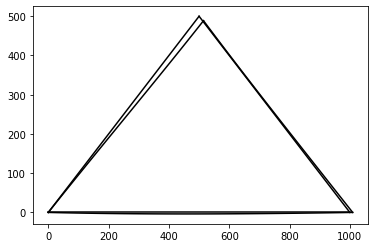

In [16]:
shower = ShowerStaticSystem(system)
shower.plot2D("xy", deformed = False)
shower.plot2D("xy", deformed = True)

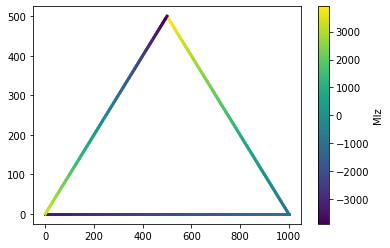

In [17]:
shower.plot2D("xy", fieldname="MIz", deformed = False)

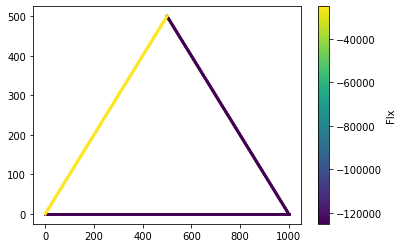

In [18]:
shower.plot2D("xy", fieldname="FIx", deformed = False)

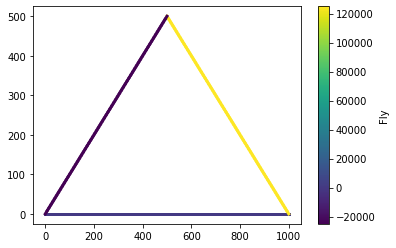

In [19]:
shower.plot2D("xy", fieldname="FIy", deformed = False)